In [142]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score   
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [143]:
df = pd.read_excel(r"/content/data.xlsx")

In [144]:

df = df.dropna()
df["Brand Size"] = df["Brand Size"].str.strip()
label_encoder = preprocessing.LabelEncoder()
df['brand']= label_encoder.fit_transform(df['Brand Name'])
# df = pd.get_dummies(df, columns = ['Brand Size'],prefix="")
df = df.drop(columns=["Type","Size","Brand Name"])

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
# df['Brand Size']= label_encoder.fit_transform(df['Brand Size'])

df= df.apply(lambda x: x.replace(' ', 0.0))
df

,Brand Size,Chest(cm),Front Length(cm),Across Shoulder(cm),brand
0,S,100.3,73.7,43.2,143
1,M,107.4,74.7,45.2,143
2,L,115.1,74.7,45.2,143
3,XL,122.7,76.5,49.0,143
4,XXL,130.3,82.0,50.8,143
...,...,...,...,...,...
761,S,106.7,74.9,45.2,131
762,M,111.8,76.2,46.5,131
763,L,116.8,77.5,47.8,131
764,XL,121.9,78.7,49.0,131


In [145]:
x = df.iloc[:,1:]
y= df.iloc[:,:1]

y_f= df.iloc[:,0].values

y_f,class_names = pd.factorize(y_f)

y_f




array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3, 6, 0, 1, 2, 0, 1,
       2, 3, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 6,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 6, 0, 1, 2, 3, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 0, 1, 2, 3, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 7, 6, 0, 1, 2, 0, 1, 2, 3, 4, 1, 2, 3, 4, 6, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2,

In [146]:
y

,Brand Size
0,S
1,M
2,L
3,XL
4,XXL
...,...
761,S
762,M
763,L
764,XL


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y_f, test_size=0.2, random_state=42)

# ***DecisionTreeClassifier***

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod

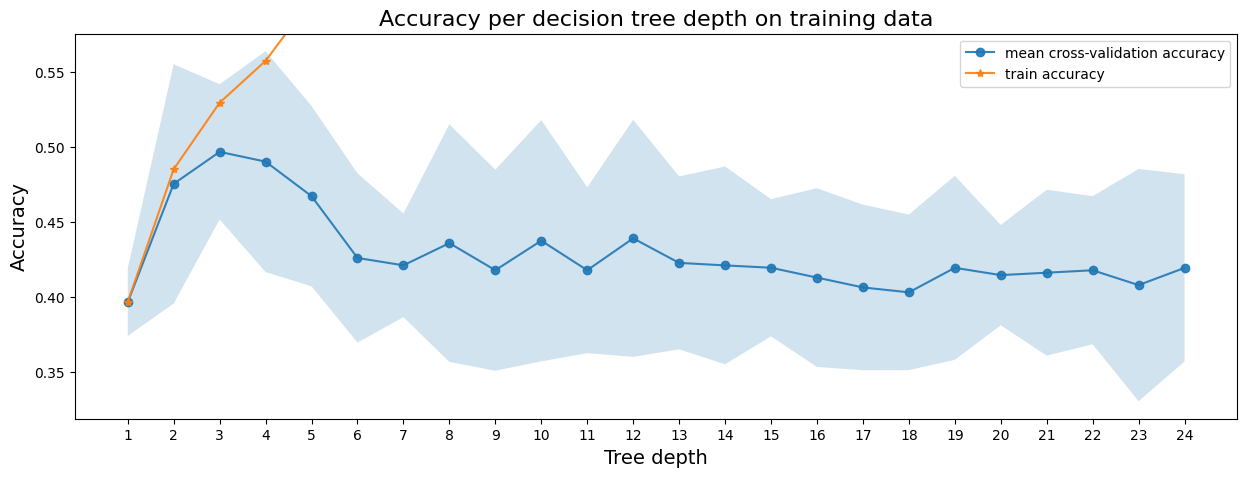

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [149]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-3 tree achieves the best mean cross-validation accuracy 49.67755 +/- 2.25771% on training dataset


In [150]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

Y_pred =classifier.predict(X_test)  
score = accuracy_score(y_test, Y_pred) 

print(score)

0.49673202614379086


In [151]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66        31
           1       0.61      0.54      0.57        37
           2       0.43      0.38      0.41        34
           3       0.30      0.50      0.37        24
           4       0.73      0.38      0.50        21
           6       0.00      0.00      0.00         6

    accuracy                           0.50       153
   macro avg       0.44      0.42      0.42       153
weighted avg       0.51      0.50      0.49       153



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


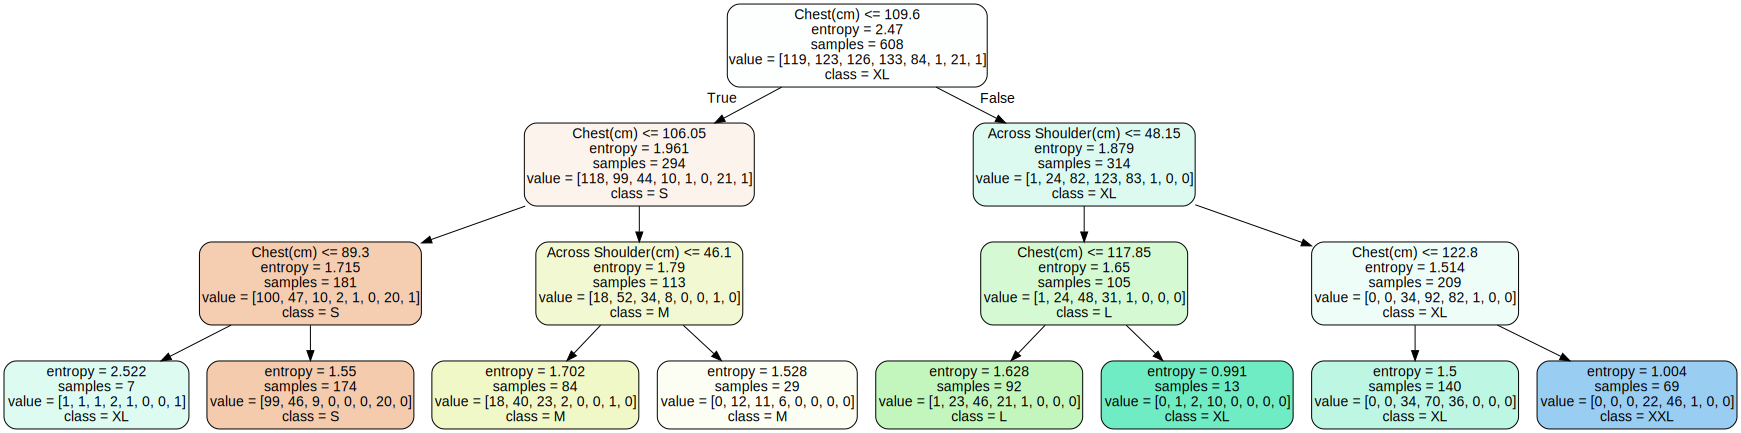

In [152]:
import graphviz
from sklearn import tree
feature_names = ['Chest(cm)','Front Length(cm)', 'Across Shoulder(cm)','brand' ]
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
graph = graphviz.Source(dot_data)
graph

# ***KNeighborsClassifier***

Maximum accuracy:- 0.4444444444444444 at K = 4


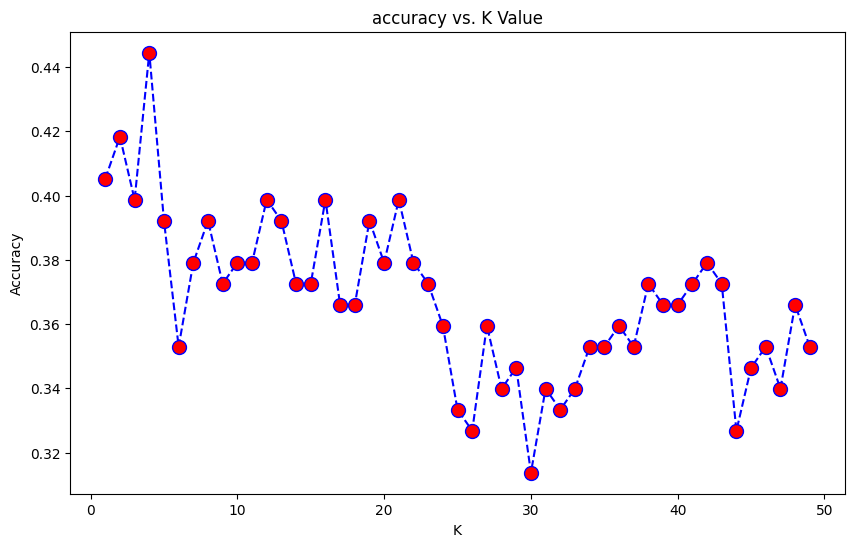

In [153]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

Minimum error:- 0.5555555555555556 at K = 4


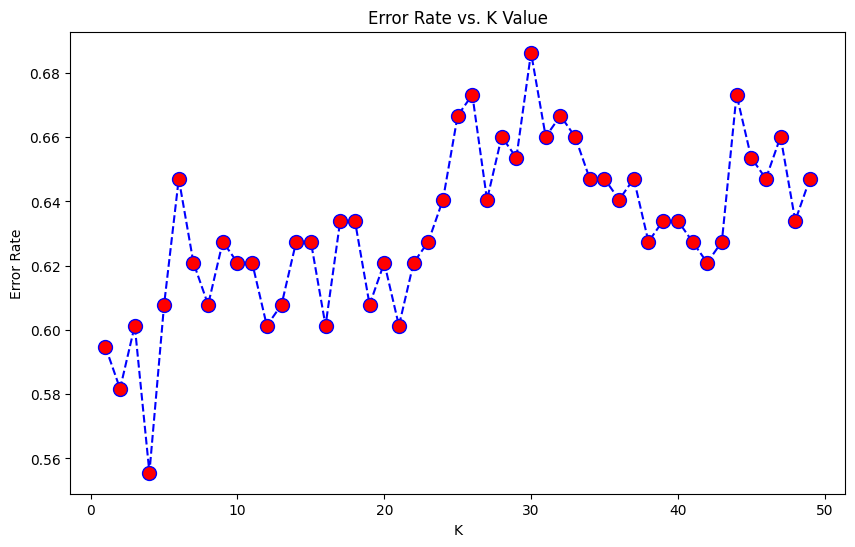

In [154]:
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [155]:

# classifier= KNeighborsClassifier(n_neighbors=4 )  
# classifier.fit(X_train, y_train)  

# Y_pred =classifier.predict(X_test)  
# score = accuracy_score(y_test, Y_pred) 
# print(score)

neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
yhat = neigh.predict(X_test)
score =accuracy_score(y_test, yhat)
print(score)

0.4444444444444444


In [156]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        31
           1       0.45      0.49      0.47        37
           2       0.34      0.32      0.33        34
           3       0.35      0.54      0.43        24
           4       0.57      0.19      0.29        21
           6       1.00      0.17      0.29         6

    accuracy                           0.44       153
   macro avg       0.55      0.40      0.40       153
weighted avg       0.48      0.44      0.43       153



# **VotingClassifier**  [ LogisticRegression,XGBClassifier,RandomForestClassifier]

In [157]:
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)


Y_pred = final_model.predict(X_test)  
score = accuracy_score(y_test, Y_pred) 

print(score)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.45751633986928103


In [158]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        31
           1       0.47      0.46      0.47        37
           2       0.42      0.38      0.40        34
           3       0.31      0.46      0.37        24
           4       0.69      0.43      0.53        21
           6       0.00      0.00      0.00         6

    accuracy                           0.46       153
   macro avg       0.41      0.40      0.39       153
weighted avg       0.46      0.46      0.45       153



# **BaggingClassifier**

In [159]:
models = []
scores = []
estimator_range=[]
for n_estimators in range(1,200):

    # Create bagging classifier
  
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)
  

    estimator_range.append(n_estimators)
    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

Maximum accuracy:- 0.49673202614379086 at K = 38


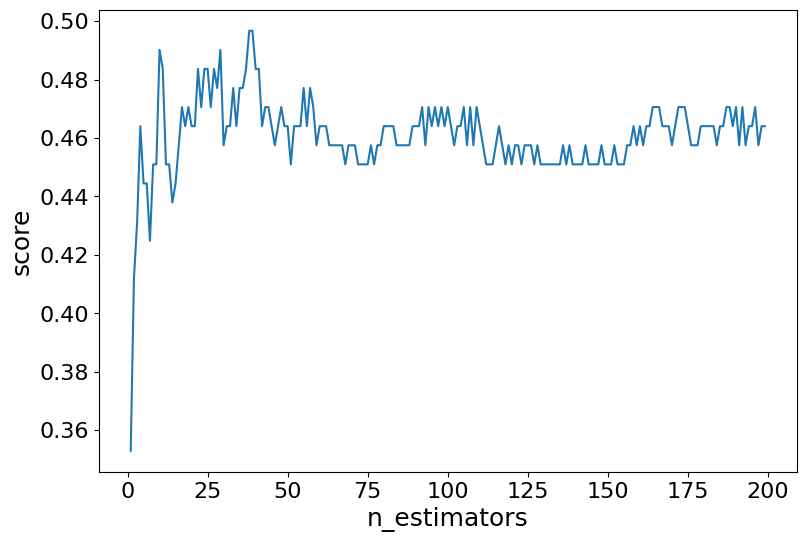

In [160]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

print("Maximum accuracy:-",max(scores),"at K =",scores.index(max(scores))+1)
plt.show()



In [161]:
clf = BaggingClassifier(n_estimators = 25,random_state = 22)

clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
score =accuracy_score(y_test, yhat)
print(score)

0.48366013071895425


In [162]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.61      0.65      0.62        31
           1       0.51      0.51      0.51        37
           2       0.44      0.41      0.42        34
           3       0.36      0.54      0.43        24
           4       0.57      0.38      0.46        21
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         0

    accuracy                           0.48       153
   macro avg       0.36      0.36      0.35       153
weighted avg       0.48      0.48      0.48       153



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

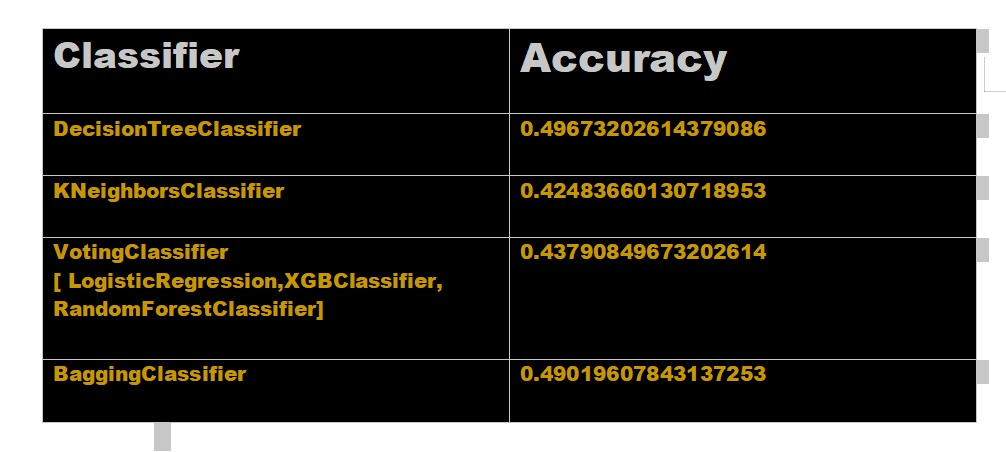